# Read and Visualise the data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# read the dataset
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# basics of the dataframe
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# missing values
round(100*(country_df.isnull().sum())/len(country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

#### There is no missing value, so we can go ahead with the data preparation!

## Data Preparation

In [6]:
#calculating the actual value of exports wrt gdp per capita
country_df['exports']= (country_df['exports']*country_df['gdpp'])/100

In [7]:
#calculating the actual value of health  wrt gdp per capita
country_df['health']= (country_df['health']*country_df['gdpp'])/100

In [8]:
#calculating the actual value of imports  wrt gdp per capita
country_df['imports']= (country_df['imports']*country_df['gdpp'])/100

In [9]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## EDA 

In [10]:
#Columns
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

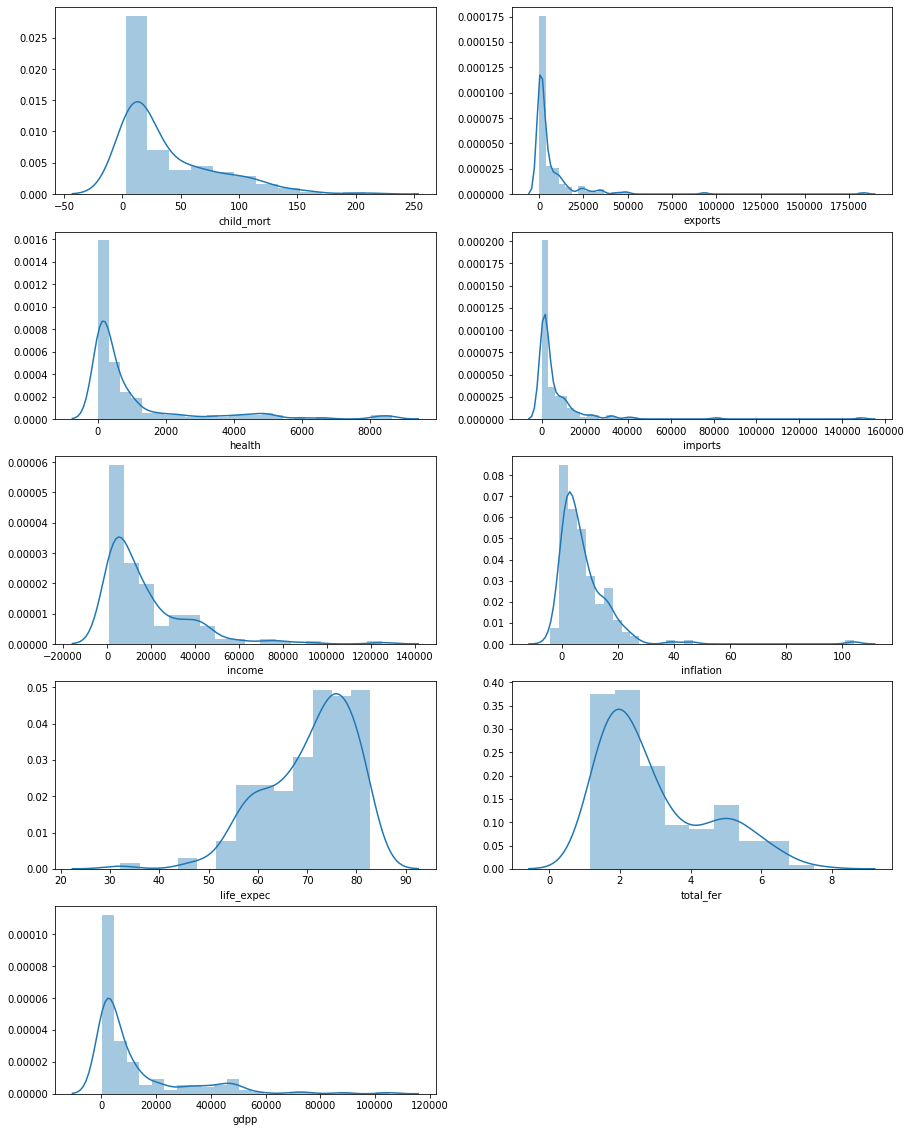

In [11]:
plt.figure(figsize = (15, 20))
feature = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(country_df[i[1]])

## Dealing with Outliers

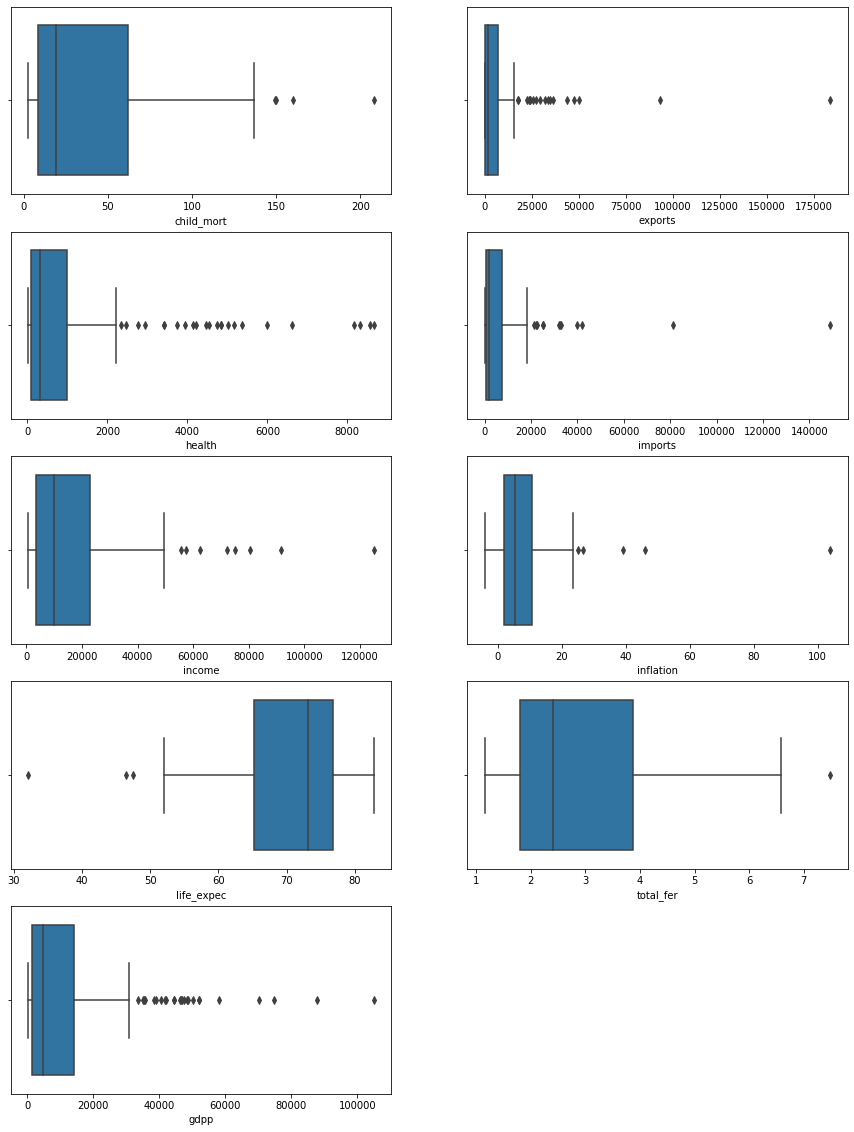

In [12]:
# Draw figures to check the presence of outliers
plt.figure(figsize = (15, 20))
feature = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(country_df[i[1]])

#### Capping the outliers

In [13]:
country_df['exports'].describe()

count       167.000000
mean       7420.618847
std       17973.885795
min           1.076920
25%         447.140000
50%        1777.440000
75%        7278.000000
max      183750.000000
Name: exports, dtype: float64

In [14]:
# Capping the values of exports column
q = country_df['exports'].quantile(0.99)

country_df['exports'][country_df['exports']>=q]=q

In [15]:
country_df['health'].describe()

count     167.000000
mean     1056.733204
std      1801.408906
min        12.821200
25%        78.535500
50%       321.886000
75%       976.940000
max      8663.600000
Name: health, dtype: float64

In [16]:
# Capping the values of health column
q = country_df['health'].quantile(0.99)

country_df['health'][country_df['health']>=q]=q

In [17]:
country_df['imports'].describe()

count       167.000000
mean       6588.352108
std       14710.810418
min           0.651092
25%         640.215000
50%        2045.580000
75%        7719.600000
max      149100.000000
Name: imports, dtype: float64

In [18]:
# Capping the values of imports column
q = country_df['imports'].quantile(0.99)

country_df['imports'][country_df['imports']>=q]=q

In [19]:
country_df['income'].describe()

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
max      125000.000000
Name: income, dtype: float64

In [20]:
# Capping the values of income column
q = country_df['income'].quantile(0.99)

country_df['income'][country_df['income']>=q]=q

In [21]:
country_df['inflation'].describe()

count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
max      104.000000
Name: inflation, dtype: float64

In [22]:
# Capping the values of inflation column
q = country_df['inflation'].quantile(0.99)

country_df['inflation'][country_df['inflation']>=q]=q

In [23]:
country_df['life_expec'].describe()

count    167.000000
mean      70.555689
std        8.893172
min       32.100000
25%       65.300000
50%       73.100000
75%       76.800000
max       82.800000
Name: life_expec, dtype: float64

In [24]:
# Capping the values of life_expec column at 1 percentile
q1 = country_df['life_expec'].quantile(0.01)

country_df['life_expec'][country_df['life_expec']<=q1]=q1

In [25]:
country_df['gdpp'].describe()

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

In [26]:
# Capping the values of gdpp column
q = country_df['gdpp'].quantile(0.99)

country_df['gdpp'][country_df['gdpp']>=q]=q

In [27]:
country_df['child_mort'].describe()

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

In [28]:
# Capping the values of child_mort column
q = country_df['child_mort'].quantile(0.99)

country_df['child_mort'][country_df['child_mort']>=q]=q

In [29]:
country_df['total_fer'].describe()

count    167.000000
mean       2.947964
std        1.513848
min        1.150000
25%        1.795000
50%        2.410000
75%        3.880000
max        7.490000
Name: total_fer, dtype: float64

In [30]:
# Capping the values of total_fer column
q = country_df['total_fer'].quantile(0.99)

country_df['total_fer'][country_df['total_fer']>=q]=q

#### Checking the boxplot after capping outliers of all the variables at 99 percentile except for 'life_expec' which is capped at 1 percentile

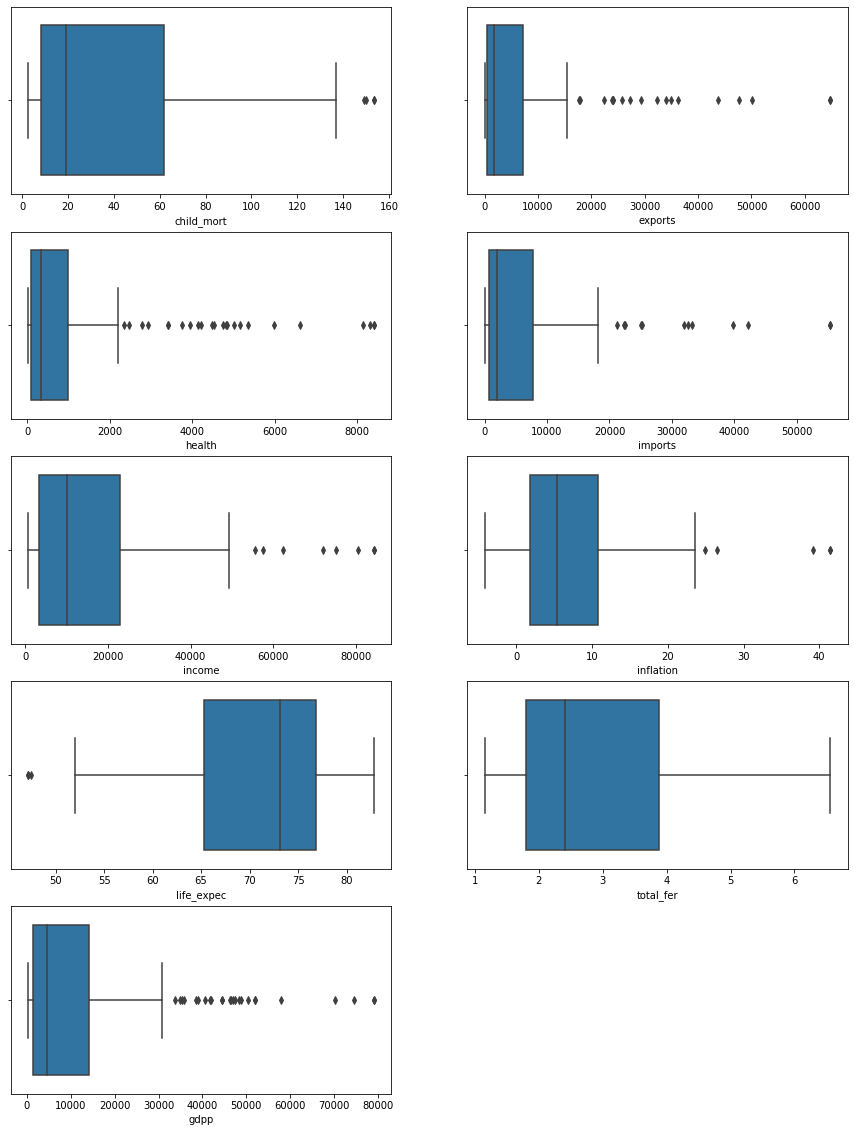

In [31]:
plt.figure(figsize = (15, 20))
feature = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(country_df[i[1]])

## Scaling

In [32]:
# 2. rescaling
country_df_1 = country_df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

# instantiate
scaler = StandardScaler()

# fit_transform
country_df_scaled = scaler.fit_transform(country_df_1)

In [33]:
country_df_scaled = pd.DataFrame(country_df_scaled)
country_df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.693071,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.662026,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.685460,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.236112,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.720610,-0.543736,-0.032042


### Hopkins score

In [34]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
hopkins(country_df_scaled)

0.8798186098103589

#### The data has meaningful clusters, as suggested by the Hopkins statistic and we can proceed to clustering.

# K-MEANS CLUSTERING

#### FInding the optimal number of clusters

### Elbow curve

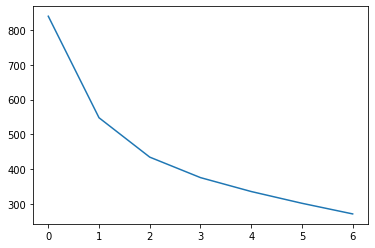

In [36]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette analysis

In [37]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46943108916984133
For n_clusters=3, the silhouette score is 0.4069661349025314
For n_clusters=4, the silhouette score is 0.3952110775478241
For n_clusters=5, the silhouette score is 0.39718334030092367
For n_clusters=6, the silhouette score is 0.2815393460304017
For n_clusters=7, the silhouette score is 0.31002443167071797
For n_clusters=8, the silhouette score is 0.27738232788205824


### Looks like n=3 will be a good choice from the elbow curve and the silhouette scores

In [38]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [40]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [41]:
# assign the cluster labels
country_df['cluster_id'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


### We cluster using the three most important variables- child_mort, income and gdpp

## Cluster Profiling with the variables 'child_mort', 'income' and 'gdpp'

In [42]:
country_df2= country_df.drop(['exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1)
country_df2.head()

,country,child_mort,income,gdpp,cluster_id
0,Afghanistan,90.2,1610.0,553.0,0
1,Albania,16.6,9930.0,4090.0,2
2,Algeria,27.3,12900.0,4460.0,2
3,Angola,119.0,5900.0,3530.0,0
4,Antigua and Barbuda,10.3,19100.0,12200.0,2


In [43]:
country_df2.cluster_id.value_counts()

2    90
0    48
1    29
Name: cluster_id, dtype: int64

### Pairwise Plotting of the Variables used for Clustering

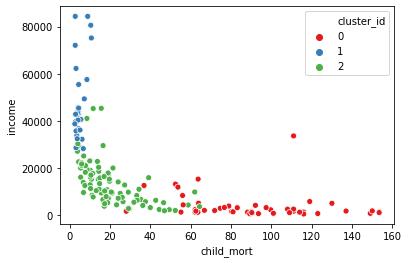

In [44]:
#### Plot between 'child_mort' and 'income'
sns.scatterplot(x = "child_mort" , y = "income", hue = 'cluster_id', data = country_df2, palette = "Set1")

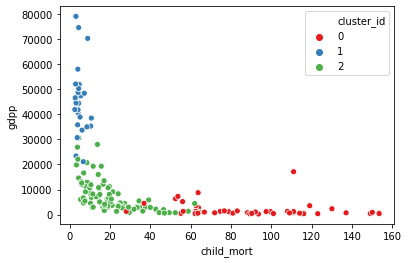

In [45]:
#### Plot between 'child_mort' and 'gdpp'
sns.scatterplot(x = "child_mort" , y = "gdpp", hue = 'cluster_id', data = country_df2, palette = "Set1")

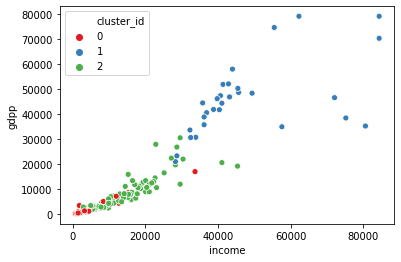

In [46]:
#### Plot between 'income' and 'gdpp'
sns.scatterplot(x = "income" , y = "gdpp", hue = 'cluster_id', data = country_df2, palette = "Set1")

### Countries belonging to Cluster_id 0 are the countries with the highest child mortality, lowest income and lowest GDP while countries belonging to Cluster_id 1 are the countries with the best performance on the metrics

### Visualization of the mean of the metrics by Cluster_id's

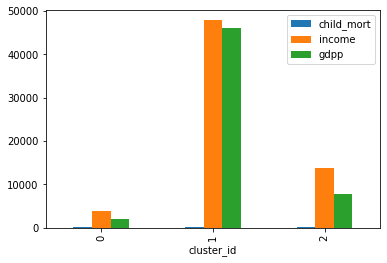

In [47]:
country_df2[['child_mort', 'income', 'gdpp', 'cluster_id']].groupby("cluster_id").mean().plot(kind = 'bar')

### The above plot makes it clear that countries belonging to cluster_id 0 are in dire states in terms of child_mortality, income and gdp per capita 

### Top 10 Countries belonging to Cluster_id 0 and need aid sooner than later is in the following list:

In [48]:
country_df2[country_df2['cluster_id']==0].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(10)

,country,child_mort,income,gdpp,cluster_id
132,Sierra Leone,153.4,1220.0,399.0,0
66,Haiti,153.4,1500.0,662.0,0
32,Chad,150.0,1930.0,897.0,0
31,Central African Republic,149.0,888.0,446.0,0
97,Mali,137.0,1870.0,708.0,0
113,Nigeria,130.0,5150.0,2330.0,0
112,Niger,123.0,814.0,348.0,0
3,Angola,119.0,5900.0,3530.0,0
37,"Congo, Dem. Rep.",116.0,609.0,334.0,0
25,Burkina Faso,116.0,1430.0,575.0,0


### So, by K-means clustering, the countries in immediate requirements of aid are:
   #### i) Sierra Leone
   #### ii) Haiti
   #### iii) Chad
   #### iv) Central African Republic
   #### v) Mali
   #### vi) Nigeria
   #### vii) Niger
   #### viii) Angola
   #### ix) Congo Dem. Rep.
   #### x) Burkina Faso

# HIERARCHICAL CLUSTERING

In [49]:
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.693071,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.662026,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.685460,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.236112,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.720610,-0.543736,-0.032042


### Single Linkage

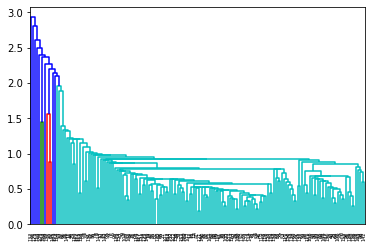

In [50]:
mergings = linkage(country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### Complete Linkage

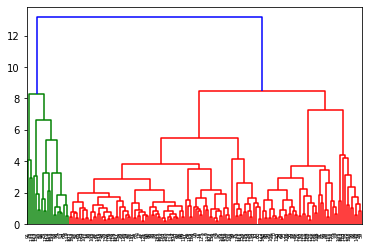

In [51]:
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Given the dendogram, ideal number of clusters should have been 4. But we checked for the results using the number of clusters as 4 and did not get good interpretable results. Hence we stuck to the number of clusters as 3 which would be useful from the business point of view as well.

In [52]:
# Choosing cluster as 3, same as what we did for K-means and check if we have any variation in the results
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [53]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,1


## Cluster Profiling for Hierarchical

In [54]:
country_df3= country_df.drop(['exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1)
country_df3.head()

,country,child_mort,income,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,1610.0,553.0,0,0
1,Albania,16.6,9930.0,4090.0,2,1
2,Algeria,27.3,12900.0,4460.0,2,1
3,Angola,119.0,5900.0,3530.0,0,0
4,Antigua and Barbuda,10.3,19100.0,12200.0,2,1


In [55]:
country_df3.cluster_labels.value_counts()

1    96
0    50
2    21
Name: cluster_labels, dtype: int64

### Pairwise Plotting of the Variables used for Hierarchical Clustering

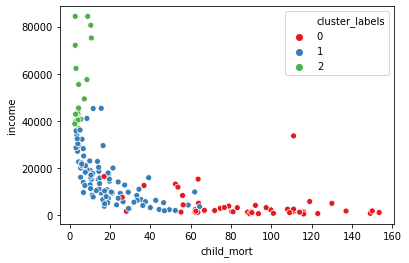

In [56]:
#### Plot between 'child_mort' and 'income'
sns.scatterplot(x = "child_mort" , y = "income", hue = 'cluster_labels', data = country_df3, palette = "Set1")

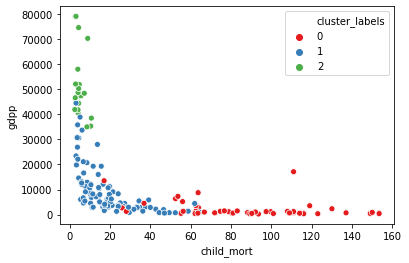

In [57]:
#### Plot between 'child_mort' and 'gdpp'
sns.scatterplot(x = "child_mort" , y = "gdpp", hue = 'cluster_labels', data = country_df3, palette = "Set1")

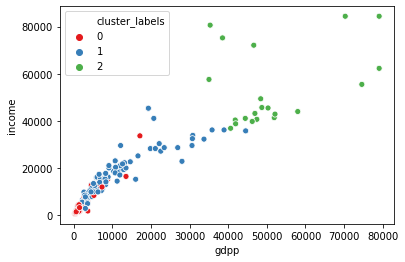

In [58]:
#### Plot between 'gdpp' and 'income'
sns.scatterplot(x = "gdpp" , y = "income", hue = 'cluster_labels', data = country_df3, palette = "Set1")

### The above visuals suggest that countries belonging to Cluster_id 0 are the countries that need aid first

### Visualization of the mean of the metrics by Cluster_id's

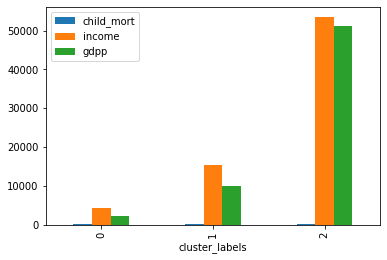

In [59]:
country_df3[['child_mort', 'income', 'gdpp', 'cluster_labels']].groupby("cluster_labels").mean().plot(kind = 'bar')

### The above visual confirms our previous result that cluster_id 0 has the countries with the worst performance on the selected metrics

### Top 10 Countries belonging to Cluster_id 0 and need aid sooner than later is in the following list:

In [60]:
country_df3[country_df3['cluster_labels']==0].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(10)

,country,child_mort,income,gdpp,cluster_id,cluster_labels
132,Sierra Leone,153.4,1220.0,399.0,0,0
66,Haiti,153.4,1500.0,662.0,0,0
32,Chad,150.0,1930.0,897.0,0,0
31,Central African Republic,149.0,888.0,446.0,0,0
97,Mali,137.0,1870.0,708.0,0,0
113,Nigeria,130.0,5150.0,2330.0,0,0
112,Niger,123.0,814.0,348.0,0,0
3,Angola,119.0,5900.0,3530.0,0,0
37,"Congo, Dem. Rep.",116.0,609.0,334.0,0,0
25,Burkina Faso,116.0,1430.0,575.0,0,0


### Using Box-plots to further verify our results

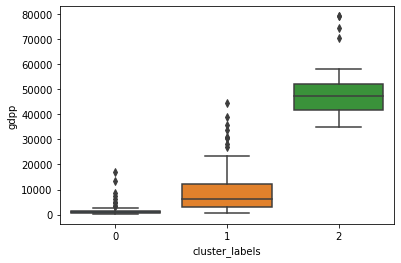

In [61]:
# boxplots for gdpp for every cluster_id
sns.boxplot(x='cluster_labels', y='gdpp', data=country_df3)

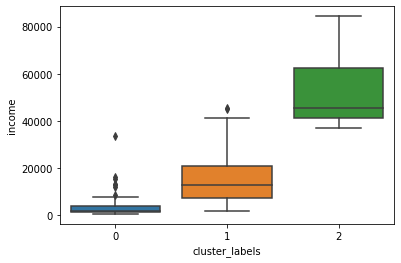

In [62]:
# boxplots for income for every cluster_id
sns.boxplot(x='cluster_labels', y='income', data=country_df3)

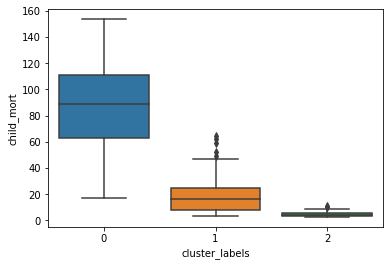

In [63]:
# boxplots for every cluster_id
sns.boxplot(x='cluster_labels', y='child_mort', data=country_df3)

### So the boxplots further confirm our results!

### So, by Hierarchical clustering, the countries in immediate requirements of aid are:
   #### i) Sierra Leone
   #### ii) Haiti
   #### iii) Chad
   #### iv) Central African Republic
   #### v) Mali
   #### vi) Nigeria
   #### vii) Niger
   #### viii) Angola
   #### ix) Congo Dem. Rep.
   #### x) Burkina Faso

### So, from both K-means and Hierarchical Clustering, we get the same list of countries with the highest child mortality, lowest income and gdp per capita and actually need financial aid at the earliest